In [39]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import plotly.express as px
import plotly.figure_factory as ff

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [40]:
#Read in the csv file and convert to a Pandas dataframe
# add it into dict to save history of each step
dfs: dict[str: pd.DataFrame] = {"raw":pd.read_csv("data/final_data.csv")}

# here we set out init df
df: pd.DataFrame = dfs["raw"].copy()

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [41]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [42]:
# here we use dtale to view the data
d = dt.show(df, host="localhost")
d.open_browser()

In [43]:
# here we kill the dtale after we finish
d.kill()

2024-05-20 05:32:21,286 - INFO     - Executing shutdown...
2024-05-20 05:32:21,287 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [44]:
df.info()
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

(10754, 22)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

- **Source**: Kaggle from Transfermarkt
- **License**: None, scraped data

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

- **Data Timeliness**: June 10, 2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [45]:
# no action needed here

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [46]:
# here we can say that player column is not needed
display(df.head(2))
display(df.columns)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [47]:
# we create history point for stage
dfs["relevance"] = df.copy()
df = dfs["relevance"]

In [48]:
# we drop the column "player"
df = df.drop("player", axis=1)
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [49]:
# here we check for duplicates
print(f"duplicates: {df.duplicated().sum()}")

duplicates: 0


In [50]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [51]:
#Display number missing values per column
print(f"Null count: \n{df.isna().sum()}\n\n")

Null count: 
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64




In [52]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [53]:
# check columns types 
display(df.head(2))
df.dtypes

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [54]:
# looks good no further actions needed
# NOTE: winger should be bool but it is okay since it only have 0 or 1

In [55]:
# check outliers 

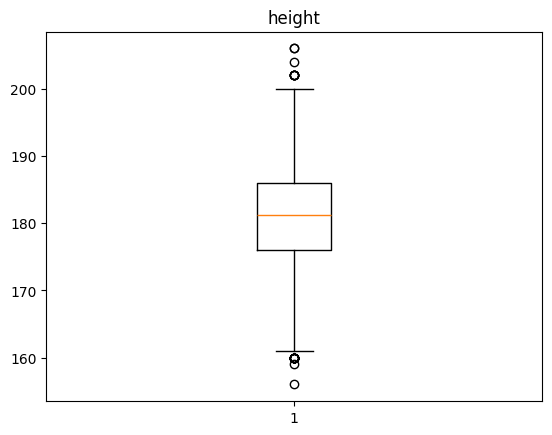

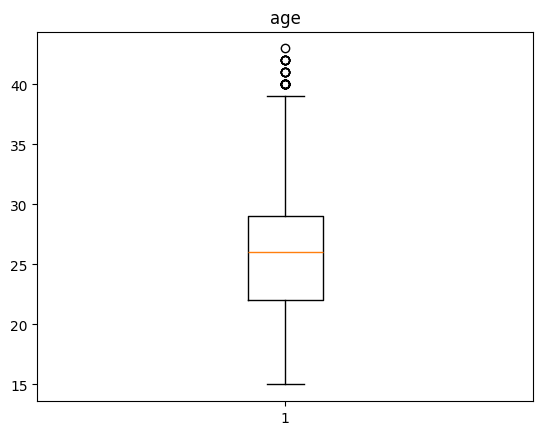

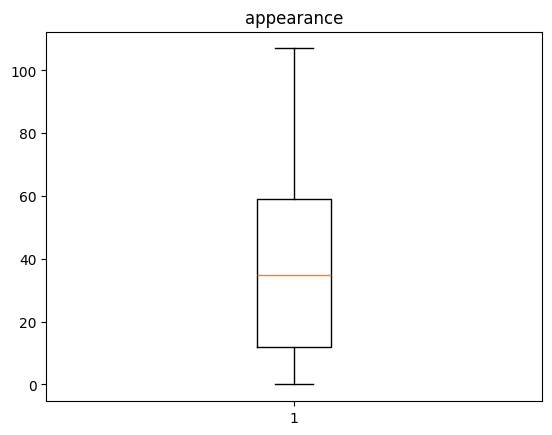

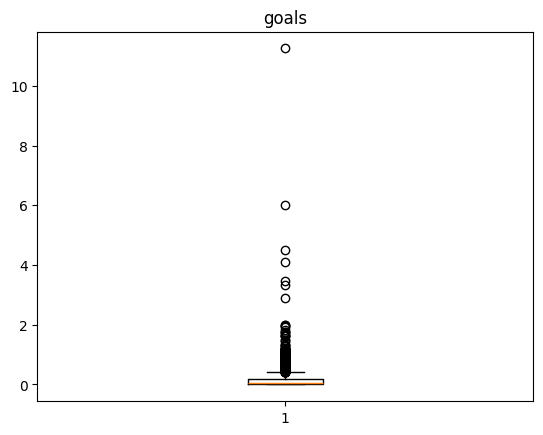

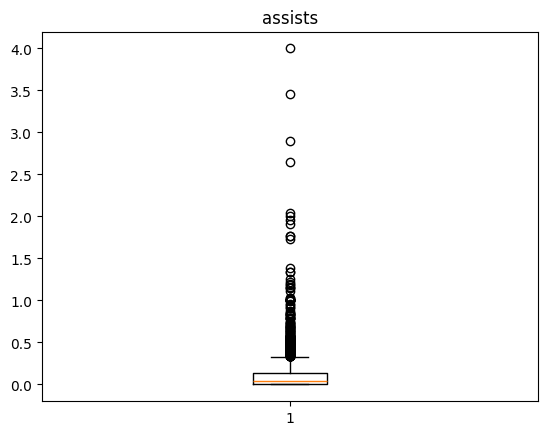

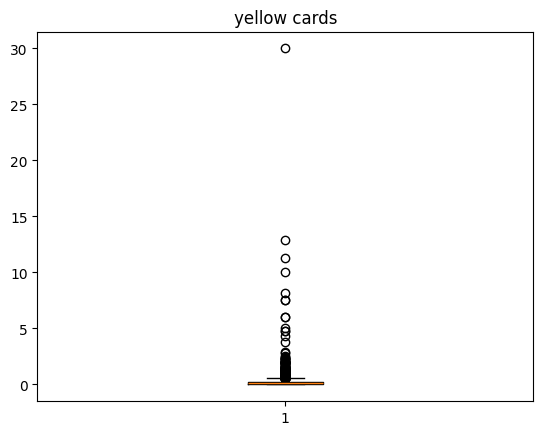

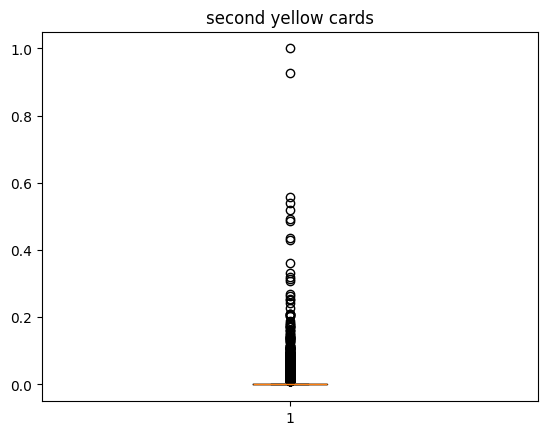

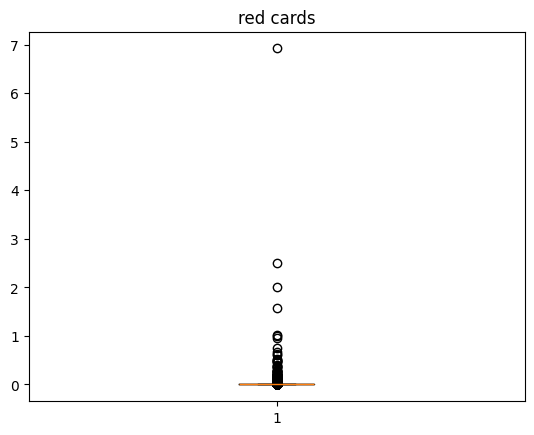

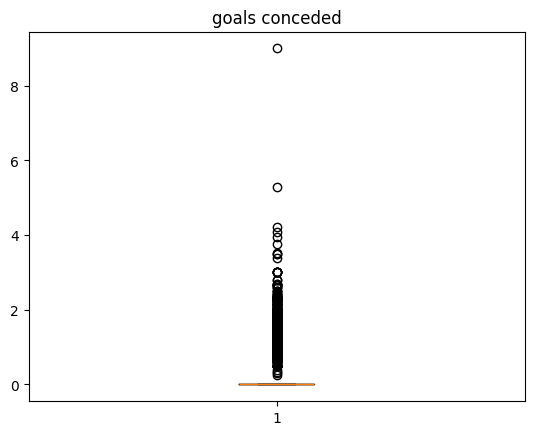

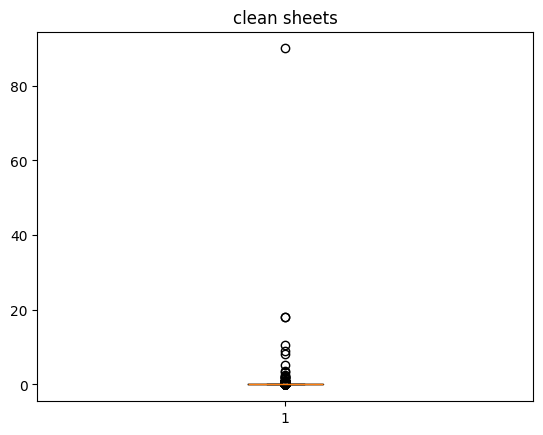

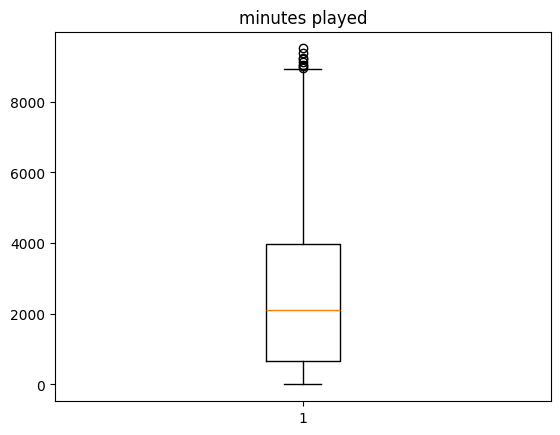

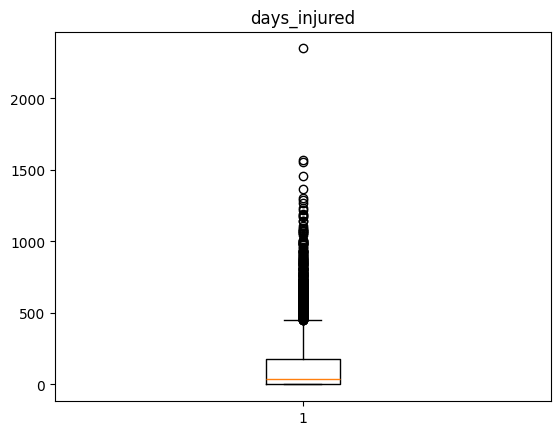

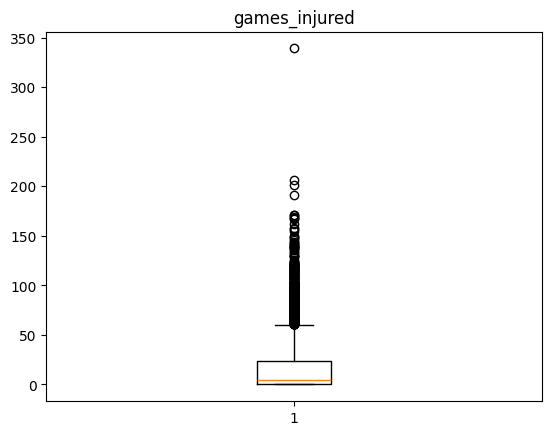

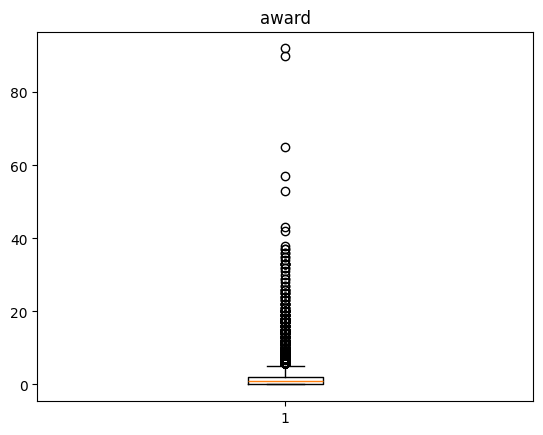

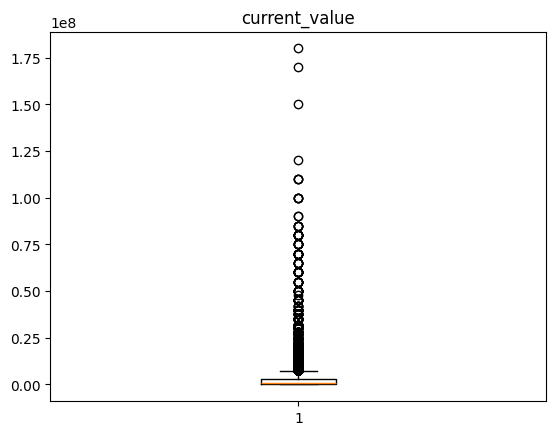

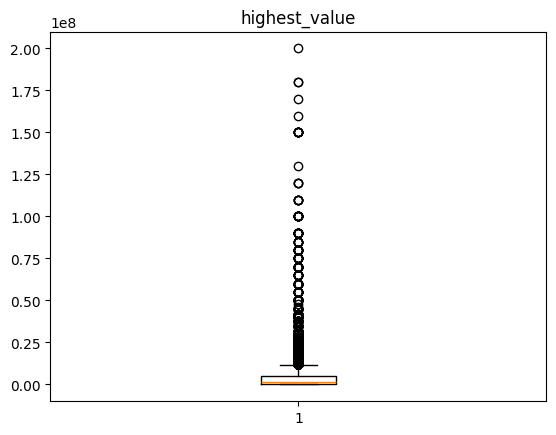

In [56]:
cols =['height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'
       ]

for i in cols:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [57]:
# here the outliers are natural and need no further actions (weak domain knowledge 😅, this maybe updated later)

In [58]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



In [59]:
# no missing

In [60]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

### Dealing with outliers:

In [61]:
# this will be later visited (weak domain knowledge)

## 3. Univariate Analysis: 

- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

### 1. Univariate Graphical Analysis:

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [62]:
fig = px.pie(df, names='position', title='Distribution of Players by Position')
fig.show()

In [63]:
position_count = df["position"].value_counts()

fig = px.bar(position_count, title='Count of Players by Position')
fig.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

1. Age Distribution


In [64]:
fig = px.histogram(df, x='age', nbins=30, title='Age Distribution', marginal='box')
fig.show()


2. Height Distribution

In [65]:
fig = px.histogram(df, x='height', nbins=30, title='Height Distribution', marginal='box')
fig.show()

3. Goals Distribution

In [66]:
fig = px.histogram(df, x='goals', nbins=30, title='Goals Distribution', marginal='box')
fig.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [67]:
display(df.select_dtypes(include=['number']).describe().round(3).T)
display(df.shape)

,count,mean,std,min,25%,50%,75%,max
height,10754.0,181.240,6.970000e+00,156.0,176.000,181.240,186.000,2.060000e+02
age,10754.0,26.042,4.778000e+00,15.0,22.000,26.000,29.000,4.300000e+01
appearance,10754.0,36.407,2.652700e+01,0.0,12.000,35.000,59.000,1.070000e+02
goals,10754.0,0.126,2.360000e-01,0.0,0.000,0.046,0.172,1.125000e+01
assists,10754.0,0.087,1.430000e-01,0.0,0.000,0.041,0.133,4.000000e+00
yellow cards,10754.0,0.190,4.320000e-01,0.0,0.053,0.150,0.248,3.000000e+01
second yellow cards,10754.0,0.005,2.500000e-02,0.0,0.000,0.000,0.000,1.000000e+00
red cards,10754.0,0.007,8.100000e-02,0.0,0.000,0.000,0.000,6.923000e+00
goals conceded,10754.0,0.132,4.420000e-01,0.0,0.000,0.000,0.000,9.000000e+00
clean sheets,10754.0,0.045,9.240000e-01,0.0,0.000,0.000,0.000,9.000000e+01


(10754, 21)

## 4. Bivariate/Multivariate Analysis:
Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [68]:
position_winger_count = df.groupby(['position', 'winger']).size().reset_index(name='count')

fig = px.bar(position_winger_count, x='position', y='count', color='winger', barmode='group',
             title='Count of Players by Position and Winger Status', labels={'winger': 'Winger (1=True, 0=False)'})
fig.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

1. Height vs Goals


In [69]:
fig = px.histogram(df, x='height', y='goals', title='Height vs Goals')
fig.show()

2. Age vs Assists


In [70]:
age_goals = df.groupby('age')['goals'].sum().reset_index()

fig = px.histogram(age_goals, nbins=35, x='age', y='goals', title='Age vs Goals')
fig.show()


1. Height vs Goals


In [71]:
fig = px.histogram(df, x='height', y='goals', title='Height vs Goals')
fig.show()

2. Age vs Assists


In [72]:
fig = px.histogram(df, x='age', y='assists', title='Age vs Assists')
fig.show()


3. Appearance vs Goals


In [73]:
fig = px.histogram(df, x='appearance', y='goals', title='Appearance vs Goals')
fig.show()


We could also use a correlation matrix to get more specific information about the relationship between these two variables.

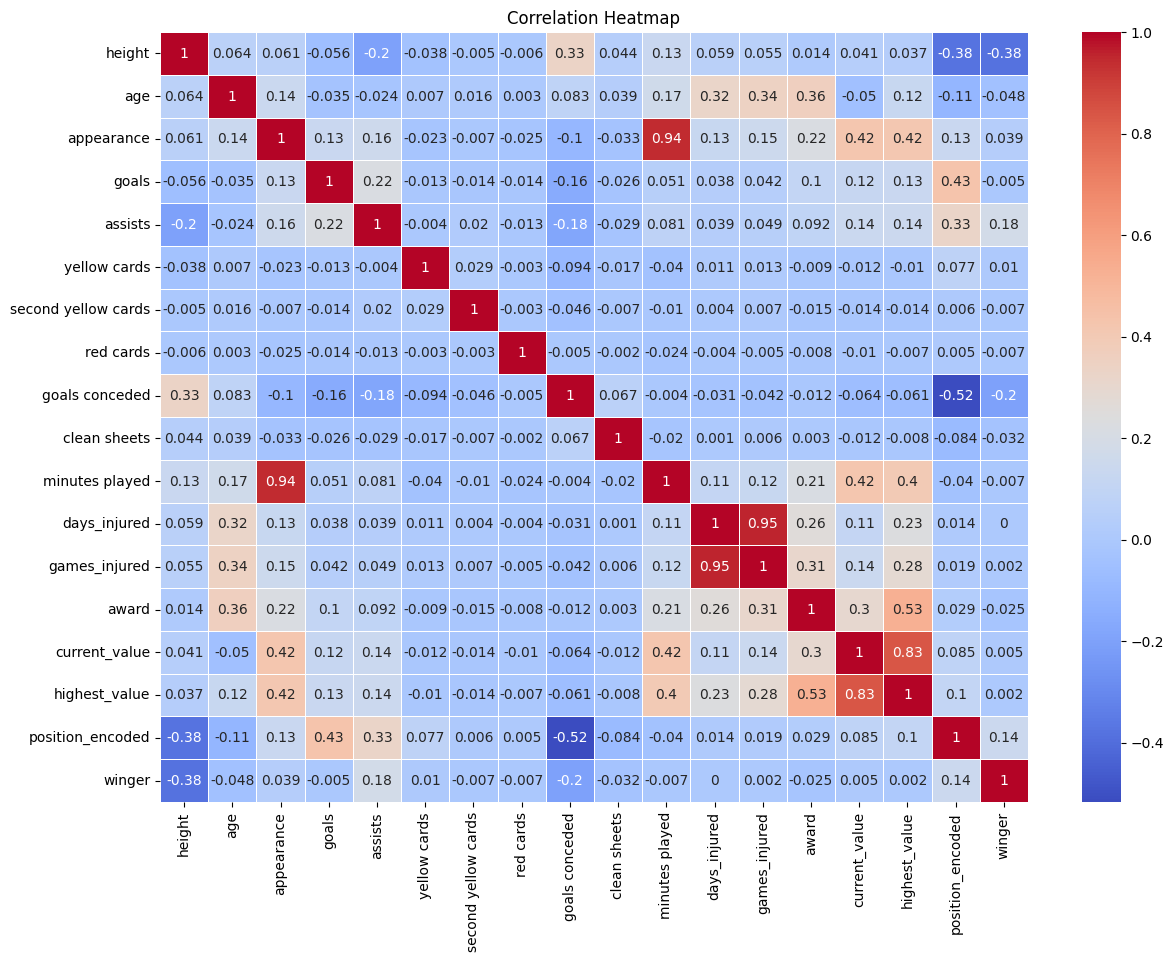

In [74]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes("number").corr().round(3)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [75]:
# this is the last step in the EDA which is extracting our clean dataset
df.to_csv("cleaned/clean_data.csv", index=False)